# Pre-trained ResNet18

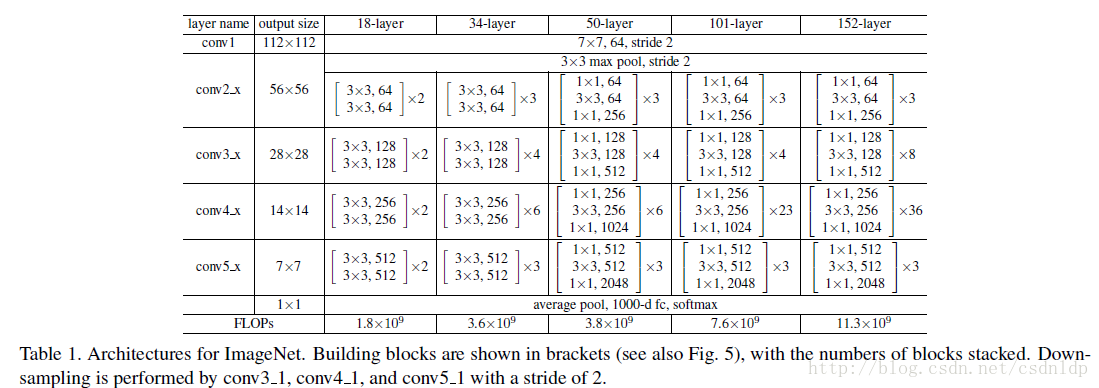

## vectorize features

In [14]:
from torchvision import models
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F
import cv2
import pandas as pd
import os
rn18 = models.resnet18(pretrained=True)
children_counter = 0
for n,c in rn18.named_children():
    print("Children: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children:  0  Layer Name:  conv1
Children:  1  Layer Name:  bn1
Children:  2  Layer Name:  relu
Children:  3  Layer Name:  maxpool
Children:  4  Layer Name:  layer1
Children:  5  Layer Name:  layer2
Children:  6  Layer Name:  layer3
Children:  7  Layer Name:  layer4
Children:  8  Layer Name:  avgpool
Children:  9  Layer Name:  fc


In [15]:
class new_model(nn.Module):
    def __init__(self,output_layer = None):
        super().__init__()
        self.pretrained = models.resnet18(pretrained=True)
        self.output_layer = output_layer
        self.layers = list(self.pretrained._modules.keys())
        self.layer_count = 0
        for l in self.layers:
            if l != self.output_layer:
                self.layer_count += 1
            else:
                break
        for i in range(1,len(self.layers)-self.layer_count):
            self.dummy_var = self.pretrained._modules.pop(self.layers[-i])
        
        self.net = nn.Sequential(self.pretrained._modules)
        self.pretrained = None

    def forward(self,x):
        x = self.net(x)
        return x

In [16]:
img = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1802_late_87.jpg')
def DNNfeatures(img,output_layer = 'layer2'):
    model = new_model(output_layer = output_layer)
    transf = transforms.Compose(
        [
            ## Scaling to [0.0,1.0]
            transforms.ToTensor(),
            transforms.Scale((224, 224))
        ]
    )
    img_tensor = transf(img)
    transf2 = transforms.Compose(
        [
            transforms.ToTensor(),
            
            ## Using the mean and std of Imagenet is a common practice. 
            ## If you want to train from scratch on your own dataset, you can calculate the new mean and std. 
            ## Otherwise, using the Imagenet pretrianed model with its own mean and std is recommended.
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        ]
    )

    img_tensor2 = transf2(img)
    img = img_tensor2.unsqueeze(0)
    out = model(img)
    print(out.shape)

    output = F.avg_pool2d(out, kernel_size=out.shape[2], stride=out.shape[2])
    print(output.shape)
    output = output.cpu().data.numpy()
    return output.flatten()

In [17]:
DNNfeatures(img)

/Users/huiminhan/opt/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])


array([0.04419649, 0.09930734, 0.05431748, 0.0363103 , 0.03139085,
       0.02234367, 0.01123588, 0.10936815, 0.0160989 , 0.25645205,
       0.01663398, 0.03270403, 0.01472863, 0.07665905, 0.05147797,
       0.03844455, 0.02286733, 0.06884516, 0.1417031 , 0.11379038,
       0.01075502, 0.03901786, 0.05479496, 0.03010337, 0.07218718,
       0.11172603, 0.03358997, 0.06522342, 0.08125043, 0.14209527,
       0.02792805, 0.11704616, 0.10193905, 0.04194355, 0.02811783,
       0.00875607, 0.27948526, 0.0751413 , 0.12250692, 0.23697741,
       0.12752897, 0.23595569, 0.06724163, 0.26450226, 0.07213363,
       0.10484922, 0.08460989, 0.03961629, 0.09477466, 0.04977171,
       0.03409054, 0.02009875, 0.04371288, 0.04989915, 0.18298364,
       0.06095923, 0.01757729, 0.05325939, 0.33298844, 0.09011552,
       0.06458691, 0.04354975, 0.02510119, 0.13274606, 0.02729868,
       0.02667243, 0.23788053, 0.21134898, 0.02259927, 0.02950503,
       0.05209127, 0.02582915, 0.03508218, 0.01142867, 0.26754

In [18]:
def batchExtractDNN(inputDir,outputDir):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,129))
    if os.path.isdir(outputDir):
        pass
    else:
        os.mkdir(outputDir)
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            try:
                src = path + image
                imgName = image.split('.')[0]
                img = cv2.imread(src)
                feature = DNNfeatures(img) 
                features.append(feature)
                index.append(imgName)
                df = pd.DataFrame(features,columns = range(1,129),index = index)
                df.index.name = 'Image'
                df.to_csv(outputDir+'DNNFeaturesBatch5.csv')
            except:
                imread_failed.append(image)
    display(df)
    return df

In [19]:
df = batchExtractDNN('../testTrainingData3/','../csvFiles/')
df

torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 188, 188])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1, 128, 150, 150])
torch.Size([1, 128, 1, 1])
torch.Size([1,

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
Image,,,,,,,,,,,,,,,,,,,,,
2098late4,0.030844,0.133735,0.052363,0.049642,0.072211,0.045923,0.016011,0.119781,0.021569,0.270749,...,0.029677,0.160822,0.075914,0.184908,0.057241,0.146210,0.023710,0.049373,0.250930,0.079271
2076late6,0.040259,0.143002,0.060883,0.038183,0.085723,0.047747,0.023201,0.133269,0.018690,0.281401,...,0.040330,0.167372,0.079414,0.186105,0.079578,0.157315,0.035975,0.057112,0.269495,0.079454
2144disease7,0.057322,0.161397,0.079792,0.054603,0.114485,0.081115,0.026530,0.166136,0.031556,0.300541,...,0.060003,0.164138,0.084579,0.185110,0.093487,0.165754,0.034145,0.058019,0.305003,0.073493
2076late5,0.040783,0.143724,0.063380,0.048648,0.099432,0.063069,0.020392,0.125229,0.026645,0.284963,...,0.052404,0.167854,0.078477,0.187598,0.081385,0.168374,0.030402,0.063042,0.282550,0.068450
2044ready5,0.040391,0.120812,0.051403,0.032604,0.048513,0.042279,0.011615,0.115111,0.028775,0.268987,...,0.029596,0.142507,0.056714,0.183422,0.044478,0.133525,0.018253,0.042973,0.237903,0.056498
2039ready13,0.049384,0.127549,0.054995,0.035195,0.066503,0.045791,0.013993,0.121474,0.029407,0.272365,...,0.036132,0.146086,0.063525,0.184767,0.047198,0.152900,0.019458,0.050523,0.244545,0.058997
2039ready12,0.048055,0.142621,0.058228,0.031464,0.068295,0.042723,0.018633,0.131971,0.020827,0.281754,...,0.038585,0.153592,0.075059,0.184297,0.064803,0.136031,0.030301,0.047985,0.263292,0.072684
2038ready3,0.048680,0.127530,0.056370,0.036937,0.073937,0.047519,0.013070,0.125201,0.027481,0.280339,...,0.031266,0.147692,0.067023,0.185077,0.054102,0.153671,0.021734,0.053285,0.247970,0.063621
2063ready6,0.044595,0.131009,0.055292,0.032961,0.066391,0.051755,0.014687,0.125944,0.029138,0.277937,...,0.036626,0.145300,0.062940,0.185245,0.056800,0.144564,0.023025,0.051959,0.247750,0.060208


,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
Image,,,,,,,,,,,,,,,,,,,,,
2098late4,0.030844,0.133735,0.052363,0.049642,0.072211,0.045923,0.016011,0.119781,0.021569,0.270749,...,0.029677,0.160822,0.075914,0.184908,0.057241,0.146210,0.023710,0.049373,0.250930,0.079271
2076late6,0.040259,0.143002,0.060883,0.038183,0.085723,0.047747,0.023201,0.133269,0.018690,0.281401,...,0.040330,0.167372,0.079414,0.186105,0.079578,0.157315,0.035975,0.057112,0.269495,0.079454
2144disease7,0.057322,0.161397,0.079792,0.054603,0.114485,0.081115,0.026530,0.166136,0.031556,0.300541,...,0.060003,0.164138,0.084579,0.185110,0.093487,0.165754,0.034145,0.058019,0.305003,0.073493
2076late5,0.040783,0.143724,0.063380,0.048648,0.099432,0.063069,0.020392,0.125229,0.026645,0.284963,...,0.052404,0.167854,0.078477,0.187598,0.081385,0.168374,0.030402,0.063042,0.282550,0.068450
2044ready5,0.040391,0.120812,0.051403,0.032604,0.048513,0.042279,0.011615,0.115111,0.028775,0.268987,...,0.029596,0.142507,0.056714,0.183422,0.044478,0.133525,0.018253,0.042973,0.237903,0.056498
2039ready13,0.049384,0.127549,0.054995,0.035195,0.066503,0.045791,0.013993,0.121474,0.029407,0.272365,...,0.036132,0.146086,0.063525,0.184767,0.047198,0.152900,0.019458,0.050523,0.244545,0.058997
2039ready12,0.048055,0.142621,0.058228,0.031464,0.068295,0.042723,0.018633,0.131971,0.020827,0.281754,...,0.038585,0.153592,0.075059,0.184297,0.064803,0.136031,0.030301,0.047985,0.263292,0.072684
2038ready3,0.048680,0.127530,0.056370,0.036937,0.073937,0.047519,0.013070,0.125201,0.027481,0.280339,...,0.031266,0.147692,0.067023,0.185077,0.054102,0.153671,0.021734,0.053285,0.247970,0.063621
2063ready6,0.044595,0.131009,0.055292,0.032961,0.066391,0.051755,0.014687,0.125944,0.029138,0.277937,...,0.036626,0.145300,0.062940,0.185245,0.056800,0.144564,0.023025,0.051959,0.247750,0.060208


In [54]:
# df_late = df[df.index.str.contains(pat = '1802')]
df_lateDisease = df[df.index.str.contains(pat = 'lateDisease')]
df_readyDisease = df[df.index.str.contains(pat = 'readyDisease')]

Image
1808readyDisease8    0.712930
1808readyDisease9    0.778686
1808readyDisease2    0.771159
1808readyDisease3    0.742301
1808readyDisease1    0.761857
1808readyDisease4    0.817316
1808readyDisease5    0.702035
1808readyDisease7    0.788563
1808readyDisease6    0.703912
Name: 336, dtype: float64

<AxesSubplot:>

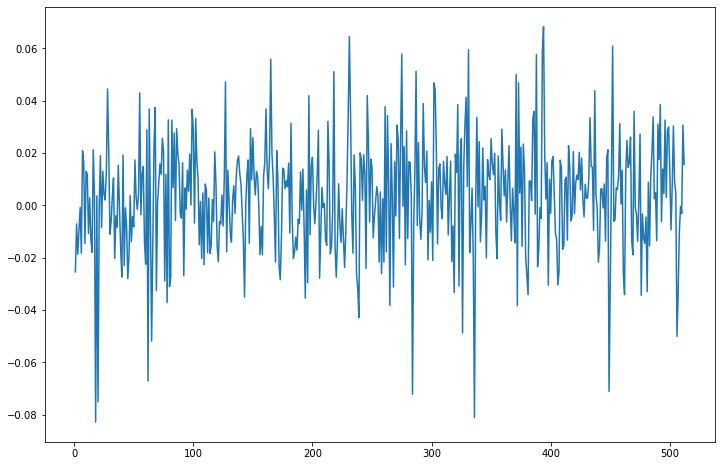

In [59]:
a = df_readyDisease.mean()-df_lateDisease.mean()
a.plot(figsize = (12,8))

In [60]:
a[abs(a)>0.06]

18    -0.082748
20    -0.074988
62    -0.067113
231    0.064441
284   -0.072149
336   -0.081035
394    0.068261
449   -0.071041
452    0.060881
dtype: float64

## Interprete Layers

In [1]:
! pwd

/Users/huiminhan/Desktop/InfoVis/CropAI/FeaturesExtraction


In [75]:
from PIL import Image
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

def save_img(tensor, name):
    tensor = tensor.permute((1, 0, 2, 3))
    im = make_grid(tensor, normalize=True, scale_each=True, nrow=16, padding=2).permute((1, 2, 0))
    im = (im.data.numpy() * 255.).astype(np.uint8)
    Image.fromarray(im).save(name + '.jpg')

# img = Image.open('../testTrainingDataMix/1803lateDisease5.jpg')
img = Image.open('../testTrainingDataMix/1793ready73.jpg')
model = models.resnet18(pretrained=True)

transform = transforms.Compose([
            transforms.Scale((224, 224)),
                         transforms.ToTensor(),
                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])])

img = transform(img)
img = img.unsqueeze(0)
      
new_model = nn.Sequential(*list(model.children())[:5])
f3 = new_model(img)
save_img(f3, '../DNNlayers/r_layer1')

new_model = nn.Sequential(*list(model.children())[:6])
f4 = new_model(img) 
save_img(f4, '../DNNlayers/r_layer2')

new_model = nn.Sequential(*list(model.children())[:7])
print(new_model)
f5 = new_model(img)  
print(f5.shape)
save_img(f5, '../DNNlayers/r_layer3')

new_model = nn.Sequential(*list(model.children())[:8])
print(new_model)
f6 = new_model(img) 
print(f6.shape)
save_img(f6, '../DNNlayers/r_layer4')


/Users/huiminhan/opt/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

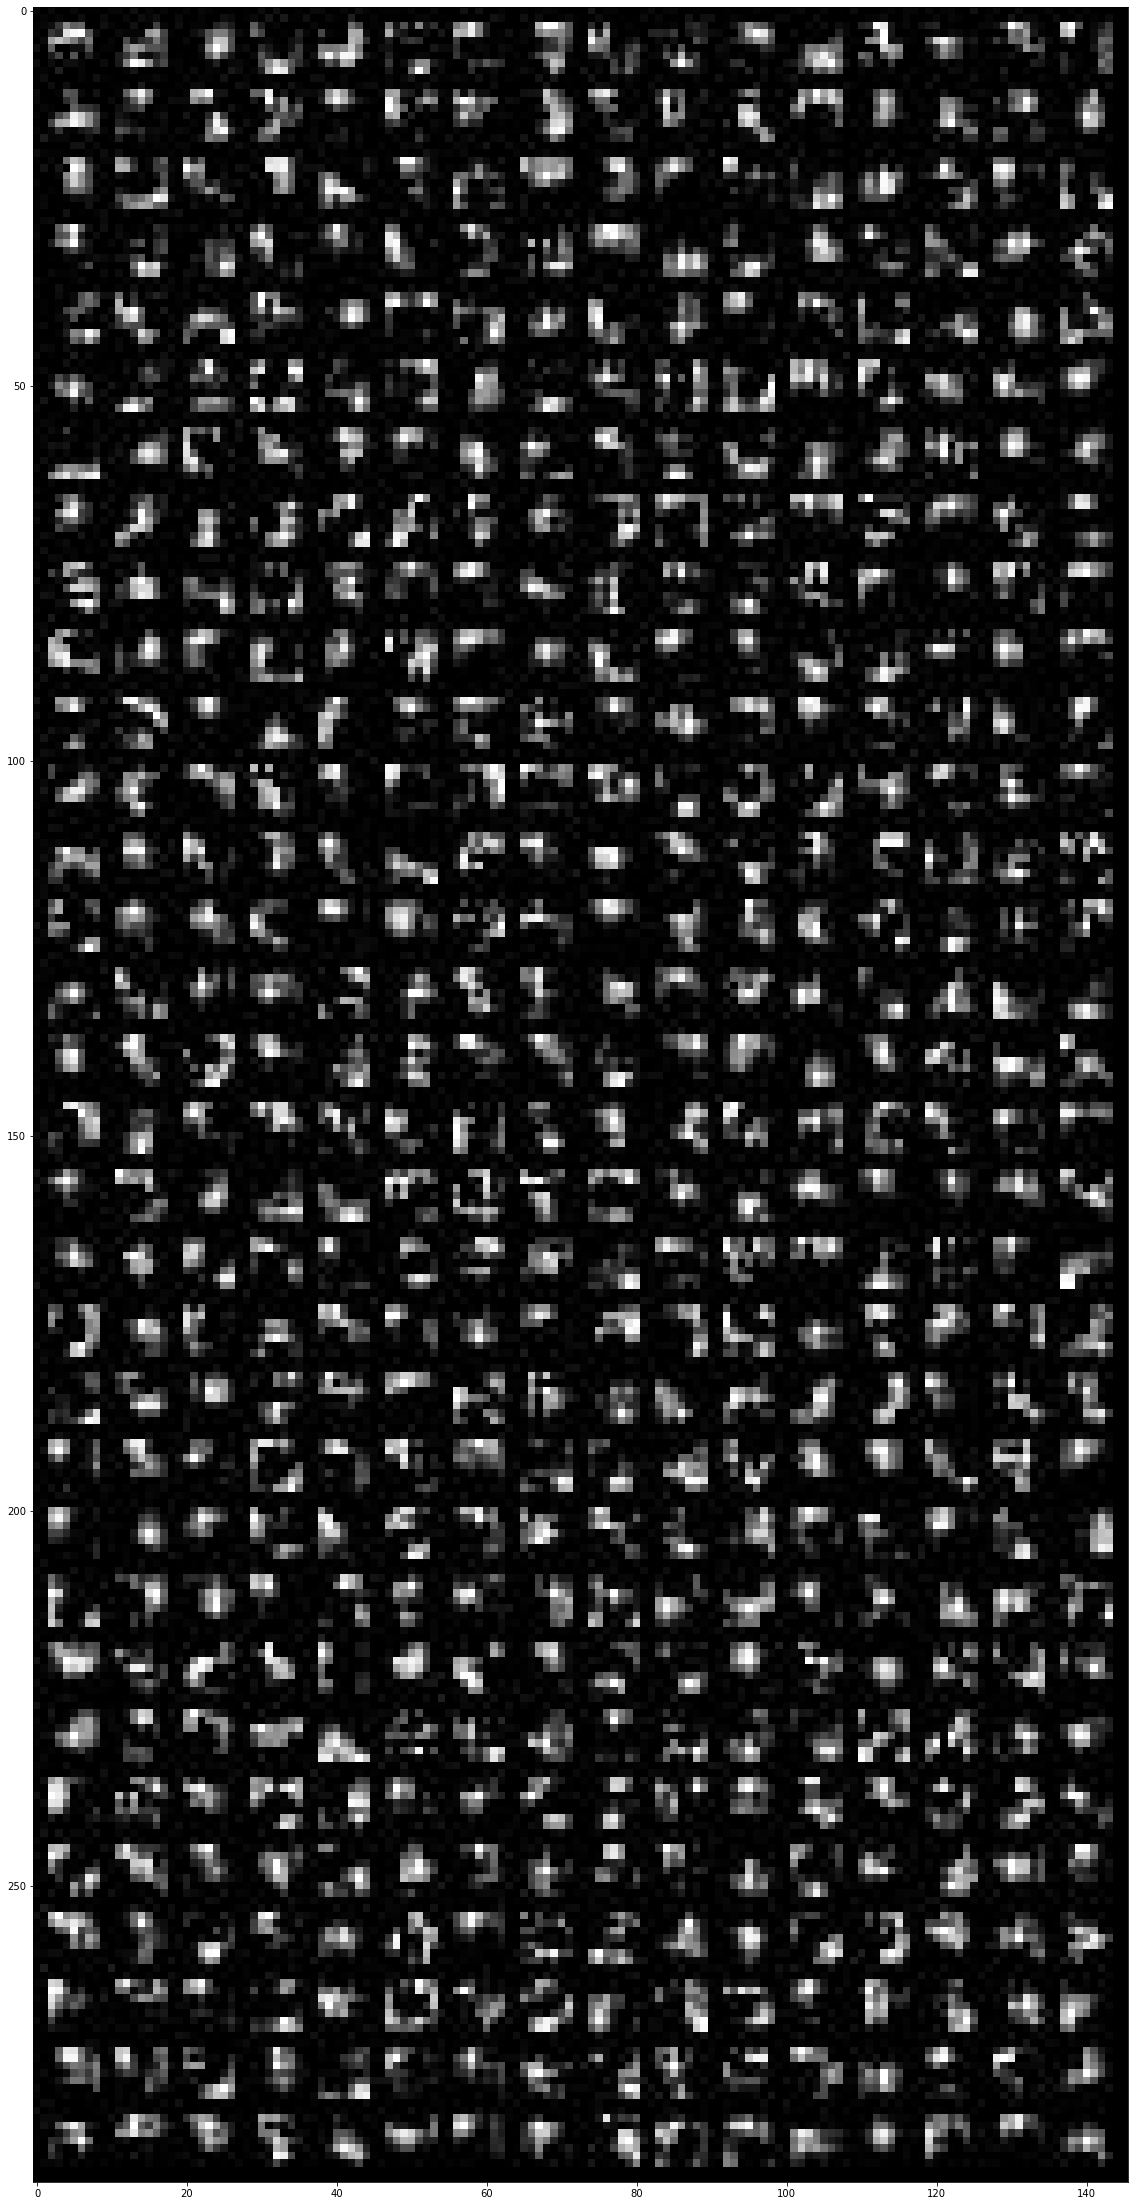

In [62]:
from IPython.core.pylabtools import figsize
figsize(20, 40)
rd_layer4 = cv2.imread('../DNNlayers/rd_layer4.jpg')
# rd_layer4
plt.imshow(rd_layer4)

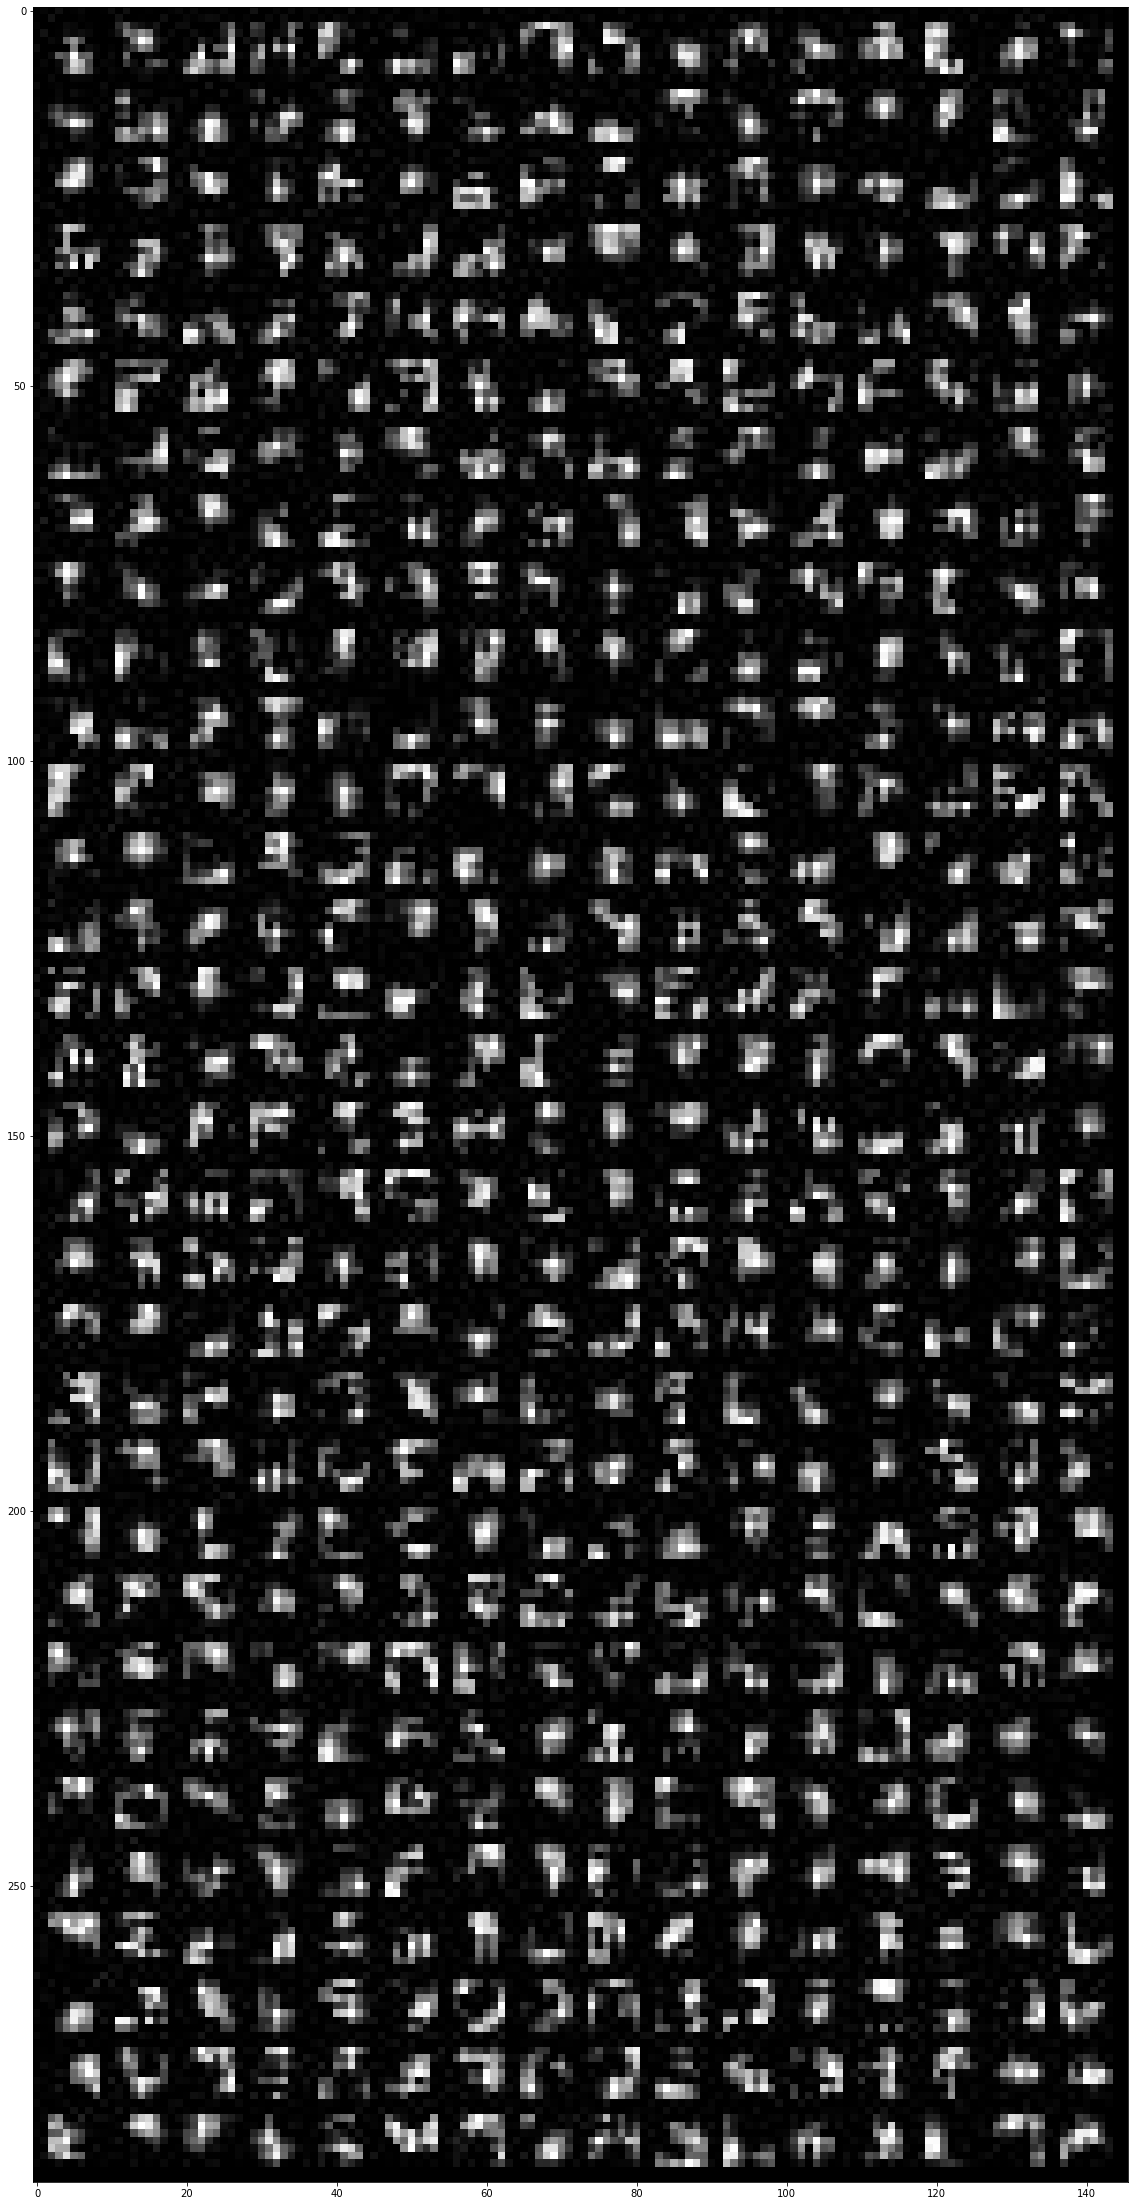

In [36]:
ld_layer4 = cv2.imread('../DNNlayers/ld_layer4.jpg')
# rd_layer4
plt.imshow(ld_layer4)

## CNN paper

In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import csv
import six

import time
import json
import warnings

try:
    import requests
except ImportError:
    requests = None

import itertools
import os
import tempfile
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

import keras
import keras.backend as K
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras import activations
from keras.models import Model,load_model

from skimage.io import imread, imshow
from skimage.transform import resize
from scipy.ndimage.interpolation import zoom
def show_inference(model,image,label="imagenet",topn=5):
    '''
    visualize inference as matplot graph.
    Args:
        model (keras model)
        image : shape (height,width,channel)
        label : only compatible for imagenet now.
        topn: top inference to show
    Returns:
        None. Will just draw a graph via plt.show()
    '''
    _image = np.expand_dims(image,axis=0)
    result = model.predict(_image)
    
    if label=="imagenet":
        decoded_result = np.array(decode_predictions(result,top=topn)[0])
        idents = [x for x in decoded_result[:,0]] 
        names = [x for x in decoded_result[:,1]] 
        vals = [float(x)*100 for x in decoded_result[:,2]]
    plt.title("Result")
    plt.barh(range(len(vals)),vals[::-1],alpha=0.2)

    plt.tick_params(
        axis='y',
        labelleft=False)
    if vals[::-1][0]<100:
        plt.xlabel("Probability (%)")
        plt.xlim([0,100])
        for i, (name, val) in enumerate(zip(names[::-1],vals[::-1])):
            plt.text(s=" ".join([name,'{:.1f}'.format(val)+"%"]), x=2, y=i, color="black", verticalalignment="center", size=14)
    else:
        plt.xlabel("A.U.")
        for i, (name, val) in enumerate(zip(names[::-1],vals[::-1])):
            plt.text(s=" ".join([name,str(int(val))]), x=2, y=i, color="black", verticalalignment="center", size=14)
    plt.show()



def show_1d_heatmap(vals,cmap="jet",layer_name=""):

    a = np.expand_dims(vals,axis=0)
    fig, ax = plt.subplots(figsize=(8,1))
    #plt.suptitle(layer_name)
    heatmap = ax.pcolor(a, cmap=cmap)
    ax.set_xticks(np.arange(a.shape[1]) + 0.5, minor=False)
    ax.set_xticklabels(np.arange(a.shape[1]))
    ax.set_yticks([])
    plt.show()



def intermediate_output(model,images,layer_name,visualize=True,row=6,col=6,cmap="jet",sortby=None):

    #batch tolerance
    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
    if len(images.shape) == 1:
        images = np.expand_dims(images,axis=0)

    layer_dict = OrderedDict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    
    input_img = model.input
    intmodel = Model(inputs=input_img,outputs=layer_output)
    intout = intmodel.predict(images)
    
    for i in range(intout.shape[0]):
        if visualize == True:
            if len(intout[i].shape) == 3:
                show_imgs(intout[i],cmap=cmap,row=row,col=col,layer_name=layer_name,sortby=sortby)
            else:
                show_1d_heatmap(intout[i],cmap=cmap,layer_name=layer_name)
    
    #if not batch, return without batch dimension
    if images.shape[0] == 1:
        intout = intout[0]

    return intout

def weights_histogram(model,layer_name):
    layer_dict = OrderedDict([(layer.name, layer) for layer in model.layers])
    weights = layer_dict[layer_name].get_weights()[0]
    plt.hist(weights.flatten())
    plt.title("weights histogram of %s" % layer_name)

def linearize_activation(model,layer_name=None):
    #clone the input model so that the original model will not be affected
    model2 = keras.models.clone_model(model)
    model2.set_weights(model.get_weights())

    #will try to modify the last layer to linear. if already linear, do nothing.
    layer_dict = OrderedDict([(layer.name, layer) for layer in model2.layers])
    reverse_layer_dict = OrderedDict(reversed(list(layer_dict.items())))
    
    layer_name_list = []
    for name,ltype in reverse_layer_dict.items():
        if "Concatenate" in str(next(iter(reverse_layer_dict.items()))): 
            print("assuming the output is a concatenate layer of inception module. will change the connected layers' activation to linear")

    for name,ltype in reverse_layer_dict.items():
        if "Concatenate" in str(next(iter(reverse_layer_dict.items()))):
            print("assuming the output is a concatenate layer of inception module. will change the connected layers' activation to linear")
            #dir(layer_dict[layer_name])
            for layer in layer_dict[layer_name]._inbound_nodes[0].inbound_layers:
                if layer.activation != activations.linear:
                    print("linearizing layer:",layer.name)
                    ltype.activation = activations.linear
            model_path = os.path.join(tempfile.gettempdir(), next(tempfile._get_candidate_names()) + ".hdf5")
            model2.save(model_path)
            model2 = load_model(model_path,compile=False)
            os.remove(model_path)
            
            return model2
        elif ltype.activation != activations.linear: 
            print("linearizing the last layer:",ltype.name)
            ltype.activation = activations.linear
            model_path = os.path.join(tempfile.gettempdir(), next(tempfile._get_candidate_names()) + ".hdf5")
            model2.save(model_path)
            model2 = load_model(model_path,compile=False)
            os.remove(model_path)
            
            return model2
        else:
            print("already a linear output model. did nothing")
            return model
def reflect_modification(model):
    model_path = os.path.join(tempfile.gettempdir(), next(tempfile._get_candidate_names()) + ".hdf5")
    model.save(model_path)
    model2 = load_model(model_path,compile=False)
    os.remove(model_path)
    return model2

def patch_occlusion(model,
                    images,
                    substitute_values=0,
                    patch_size=10,
                    strides=5,
                    normalize=True):
    lmodel = linearize_activation(model)
    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
    B = images.shape[0]
    H = images.shape[1]
    W = images.shape[2]
    C = images.shape[3]
    vals = []
    val = []
    #infer per image
    for batch in range(B): #iterate per image
        substituted = []
        base = model.predict(np.expand_dims(images[batch],axis=0))[0]
        cls = np.argmax(base)
        base_val = np.max(base)
        occluded_images = []
        height_of_occluded = 0
        width_of_occluded = 0

        for h in range(H)[::strides]:
            height_of_occluded += 1
            for w in range(W)[::strides]:
                width_of_occluded += 1
                tmp = images[batch].copy() #1,2000,4
                
                hstart = np.maximum(h-int(patch_size/2),0)
                hend = np.minimum(h+int(patch_size/2),tmp.shape[0])
                wstart = np.maximum(w-int(patch_size/2),0)
                wend = np.minimum(w+int(patch_size/2),tmp.shape[1])
                #print("w",w)
                #print(wstart,wend)
                #print(wend-wstart)
                replace_val = np.full((hend-hstart,wend-wstart,3),substitute_values)
                
                tmp[hstart:hend,wstart:wend] = replace_val
                #print(h-int(patch_size/2),h+int(patch_size/2))
                occluded_images.append(tmp)
                #val.append(model.predict(np.expand_dims(tmp,axis=0))[0,cls])
        width_of_occluded /= height_of_occluded
        width_of_occluded = int(width_of_occluded)
        occluded_images = np.array(occluded_images)
        val = model.predict(occluded_images,batch_size=10)[:,cls]

        if normalize:
            #normalize by subtracting the default inference value
            val -= base_val
            #negative values means important so swaping pos neg
            val *= -1
            val = np.maximum(0,val)
            val /= val.max()
        val = np.reshape(val,(height_of_occluded,width_of_occluded))
        #val = resize(val,(H,W))
        val = zoom(val,H/val.shape[0],mode="reflect")
        vals.append(val)
    
    vals = np.array(vals)
    vals = np.reshape(vals,(B,H,W))
    if vals.shape[0] == 1:
        vals = vals[0]
    return vals

def pixel_wise_occlusion(model, images,substitute_values=-0.25,skip_pixel=16,method="normalize"):

    #make the output layer linear so that prediction value will not be restricted to 0 to 1
    lmodel = linearize_activation(model)

    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
    B = images.shape[0]
    H = images.shape[1]
    W = images.shape[2]
    C = images.shape[3]
    vals = []
    val = []
    #infer per image
    for batch in range(B): #iterate per image
        substituted = []
        base = model.predict(np.expand_dims(images[batch],axis=0))[0]
        cls = np.argmax(base)
        base_val = np.max(base)
        for h in range(H)[::skip_pixel]:
            for w in range(W)[::skip_pixel]:
                tmp = images[batch].copy() #1,2000,4
                replace_val = np.array([substitute_values]*C)
                tmp[h,w] = replace_val
                val.append(model.predict(np.expand_dims(tmp,axis=0))[0,cls])
                
        val = np.array(val)
        
        if method=="normalize":
            #normalize by subtracting the default inference value
            val -= base_val
            #negative values means important so swaping pos neg
            val *= -1
            val = np.maximum(0,val)
            val /= val.max()
        val = np.reshape(val,(int(H/skip_pixel),int(W/skip_pixel)))
        #val = resize(val,(H,W))
        val = zoom(val,H/val.shape[0])
        vals.append(val)
    
    vals = np.array(vals)
    vals = np.reshape(vals,(B,H,W))
    if vals.shape[0] == 1:
        vals = vals[0]
    return vals

def grad_cam(input_model, images, layer_name, cls=-1, method = "naive",resize_to_input=True):
    #check input shape first. whether its a batch or not.
    batch = True
    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
        batch = False
    
    #image shape will be (batch,H,W,channel)
    H = images.shape[1]
    W = images.shape[2]

    cam = []

    for i in range(images.shape[0]):
        if cls == -1:
            _cls = np.argmax(input_model.predict(images[i:i+1]))
        else:
            _cls = cls

        y_c = input_model.output[0, _cls]
        conv_output = input_model.get_layer(layer_name).output

        #print(i)
        if method == "naive":
            grads = K.gradients(y_c, conv_output)[0]
            gradient_function = K.function([input_model.input], [conv_output, grads])
            _output, _grads_val = gradient_function([images[i:i+1]])
            _output, _grads_val = _output[0,:,:,:], _grads_val[0, :, :, :]
            _weights = np.mean(_grads_val, axis=(0, 1))
            _cam = np.dot(_output, _weights)
        elif method == "gradcampp":
            grads = K.gradients(y_c, conv_output)[0]
            first = K.exp(y_c)*grads
            second = K.exp(y_c)*grads*grads
            third = K.exp(y_c)*grads*grads
            gradient_function = K.function([input_model.input], [first,second,third, conv_output, grads])

            conv_first_grad, conv_second_grad,conv_third_grad, conv_output, grads_val = gradient_function([images[i:i+1]])
            global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)
            alpha_num = conv_second_grad[0]
            alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
            alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
            alphas = alpha_num/alpha_denom
            _weights = np.maximum(conv_first_grad[0], 0.0)
            alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)
            alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
            deep_linearization_weights = np.sum((_weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)
            _cam = np.sum(deep_linearization_weights*conv_output[0], axis=2)
        #scale 0 to 1 rather than clip 0 then divide by max
        #_cam = (_cam-_cam.min())/(_cam.max()-_cam.min())
        _cam = np.maximum(_cam,0)
        #_cam = _cam / _cam.max()
        if resize_to_input:
            #_cam = resize(_cam, (H, W))
            _cam = zoom(_cam,H/_cam.shape[0])
        cam.append(_cam)
    cam = np.array(cam)
    
    #if not batch, return without batch dimension
    if batch == False:
        cam = cam[0]
    del gradient_function
    return cam

def build_guided_model(model):

    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                   tf.cast(op.inputs[0] > 0., dtype)
    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        layer_dict = [layer for layer in model.layers
                      if hasattr(layer, 'activation')]
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu
        lmodel = linearize_activation(model)
        gmodel = reflect_modification(lmodel)
    return gmodel


def guided_backprop(input_model, images, layer_name="predictions",cls=-1,normalize="img_standard"):

    #batch_tolerance
    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
    if len(images.shape) == 1:
        images = np.expand_dims(images,axis=0)

    grads_val = []

    for i in range(images.shape[0]):
        if cls == -1:
            _cls = np.argmax(input_model.predict(images[i:i+1]))
        else:
            _cls = cls

        input_imgs = input_model.input
        #layer_output =  input_model.get_layer(layer_name).output
        layer_output = input_model.get_layer(layer_name).output[0,_cls]
        #max_output = K.max(layer_output, axis=1)
        #grads = K.gradients(K.sum(max_output), input_imgs)[0]
        grads = K.gradients(layer_output,input_imgs)[0]
        backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
        

        _grads_val = backprop_fn([images[i:i+1], 0])[0][0]
        
        if normalize == "raw":
            pass
        elif normalize == "img_standard":
            _grads_val = deprocess_image(_grads_val)
        elif normalize == "abs":
            _grads_val = np.abs(_grads_val).max(axis=-1) / _grads_val.max()
        elif normalize == "pos":
            _grads_val = np.maximum(0, _grads_val) / _grads_val.max()
        elif normalize == "neg":
            _grads_val *= -1
            _grads_val = np.maximum(0, _grads_val) / _grads_val.max()
        grads_val.append(_grads_val)
    grads_val = np.array(grads_val)

    #if not batch, return without batch dimension
    if grads_val.shape[0] == 1:
        grads_val = grads_val[0]

    #delete backprop_fn to free memory
    del backprop_fn
    
    return grads_val

def guided_gradcam(model, images,gradcam_layer_name = "block5_pool",guidedbp_layer_name = "predictions",cls = -1):
    cam  = grad_cam(model, images, gradcam_layer_name, cls=cls, method = "naive")
    gb = guided_backprop(model,images,guidedbp_layer_name,normalize="raw")
    print(cam.shape,gb.shape)
    
    #if input image is single, the shape of cam and gc is (224,224) and (224,224,3),respectively
    if len(cam.shape)==2:
        cam = np.expand_dims(cam,axis=0)
        gb = np.expand_dims(gb,axis=0)
    ggc = []    
    for c,g in zip(cam,gb):
        print(c.shape,g.shape)
        ggc.append(deprocess_image(g * c[..., np.newaxis]))
    ggc = np.array(ggc)
    print(ggc.shape)
    #if not batch, return without batch dimension
    if ggc.shape[0] == 1:
        ggc = ggc[0]
    return ggc
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    #from the sklearn examples
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.    
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import csv
import six

import time
import json
import warnings

try:
    import requests
except ImportError:
    requests = None

import itertools
import os
import tempfile
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

import keras
import keras.backend as K
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras import activations
from keras.models import Model,load_model

from skimage.io import imread, imshow
from skimage.transform import resize
from scipy.ndimage.interpolation import zoom

# Paper

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from torchvision.utils import make_grid
from torchvision import models
# from utils import *
import keras
import keras.backend as K
from keras import activations
from keras.applications.inception_v3 import inception_v3
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model,load_model

import tensorflow as tf
from tensorflow.python.framework import ops

from skimage.io import imread, imshow
from skimage.transform import resize

from IPython.core.pylabtools import figsize
from collections import OrderedDict
figsize(20, 40)

In [16]:
def first_conv_filters(model,row=8,col=8,visualize=True):
    #obtain the first conv2d layer.
    layer_dict = OrderedDict([(layer.name, layer) for layer in model.layers])
    for name,ltype in layer_dict.items():
        if "Conv" in str(ltype):
            layer_name = name
            print("Attempting to visualize the first conv2d layer : %s" % layer_name)
            break

    weights = layer_dict[layer_name].get_weights()[0]
    if visualize:
        show_imgs(weights)
    return weights

def show_imgs(imgs,cmap="jet",row=6, col=6,sortby=None,layer_name=""):

    if len(imgs.shape)==4:
        imgs = imgs.transpose(3,0,1,2)
    if len(imgs.shape)==3:
        imgs = imgs.transpose(2,0,1)
    indices = range(len(imgs))
    if len(imgs) > (row * col):
        print("number of image exceeds row*col. first %s images will be drawn" % (row*col))
    plt.figure(figsize=(16, 16)) 
    #plt.suptitle(layer_name)
    for i, img in zip(indices,imgs):
        if i == (row*col):
            break
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.title("Filter:%s" % i,size=12)
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")
        plt.imshow(deprocess_image(img),cmap=cmap)
    plt.tight_layout()

def deprocess_image(x):
        x = x.copy()
        if np.ndim(x) > 3:
            x = np.squeeze(x)
        # normalize tensor: center on 0., ensure std is 0.1
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # clip to [0, 1]
        x += 0.5
        x = np.clip(x, 0, 1)

        # convert to RGB array
        x *= 255
        if K.image_data_format() == 'th':
            x = x.transpose((1, 2, 0))
        x = np.clip(x, 0, 255).astype('uint8')
        return x
def intermediate_output(model,images,layer_name,visualize=True,row=6,col=6,cmap="jet",sortby=None):

    #batch tolerance
    if len(images.shape) == 3:
        images = np.expand_dims(images,axis=0)
    if len(images.shape) == 1:
        images = np.expand_dims(images,axis=0)

    layer_dict = OrderedDict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    
    input_img = model.input
    intmodel = Model(inputs=input_img,outputs=layer_output)
    intout = intmodel.predict(images)
    
    for i in range(intout.shape[0]):
        if visualize == True:
            if len(intout[i].shape) == 3:
                show_imgs(intout[i],cmap=cmap,row=row,col=col,layer_name=layer_name,sortby=sortby)
            else:
                show_1d_heatmap(intout[i],cmap=cmap,layer_name=layer_name)
    
    #if not batch, return without batch dimension
    if images.shape[0] == 1:
        intout = intout[0]

    return intout

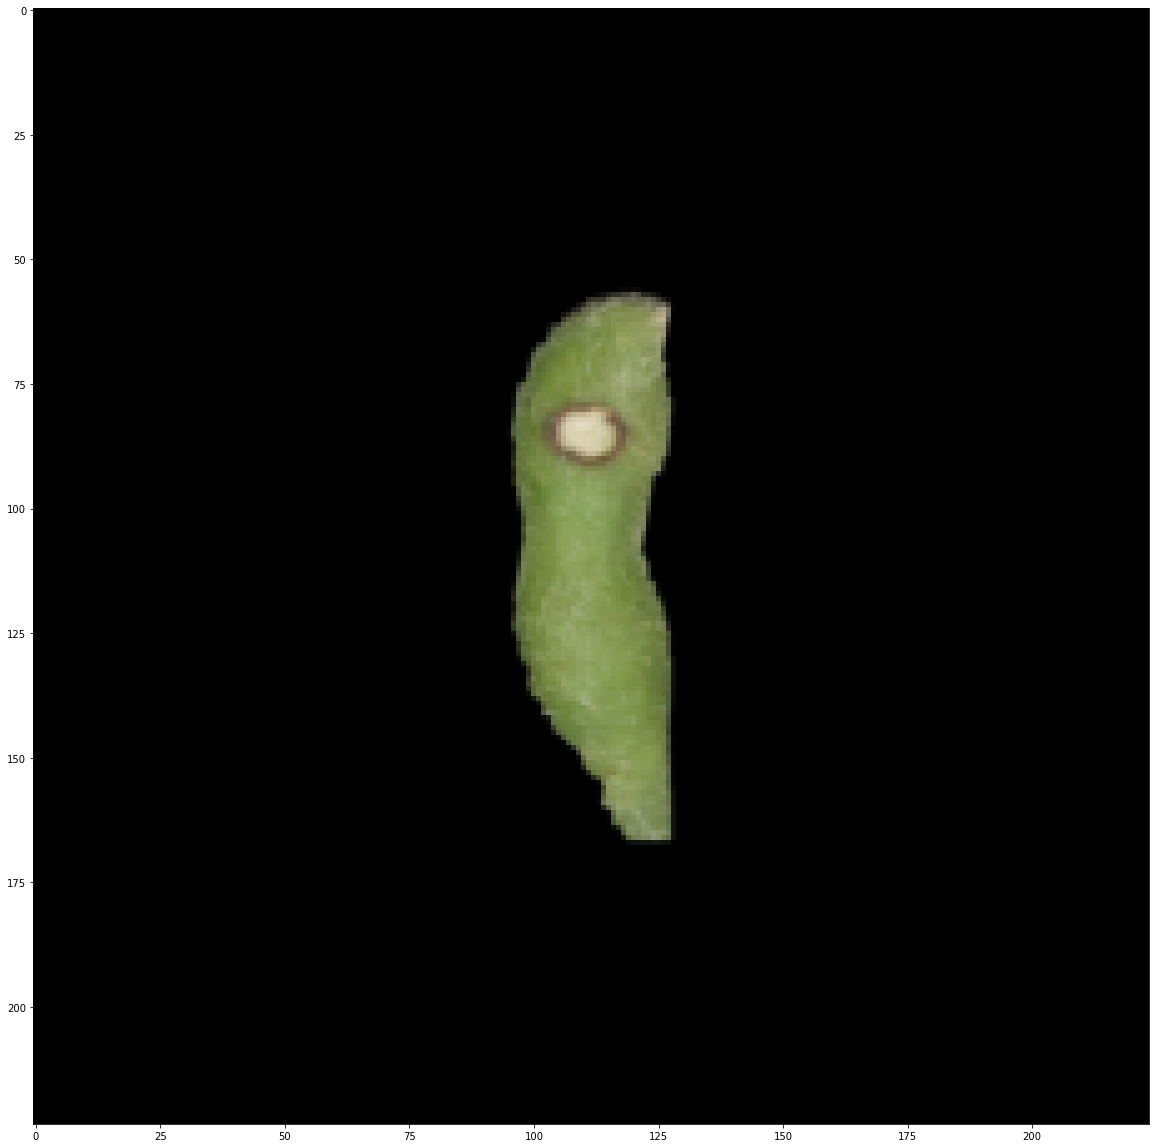

In [4]:
img = imread('../CroppedImageData/Crop_batch4_labeled/disease/croped_IMG_2103_disease_3.jpg')
# model = models.resnet18(pretrained=True)
x = resize(img,(224,224))*255.
x = x.astype(np.uint8)
plt.imshow(x)

In [5]:
K.clear_session()
model = VGG16(input_shape=(224,224,3),weights="imagenet")

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Attempting to visualize the first conv2d layer : block1_conv1
number of image exceeds row*col. first 36 images will be drawn


array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

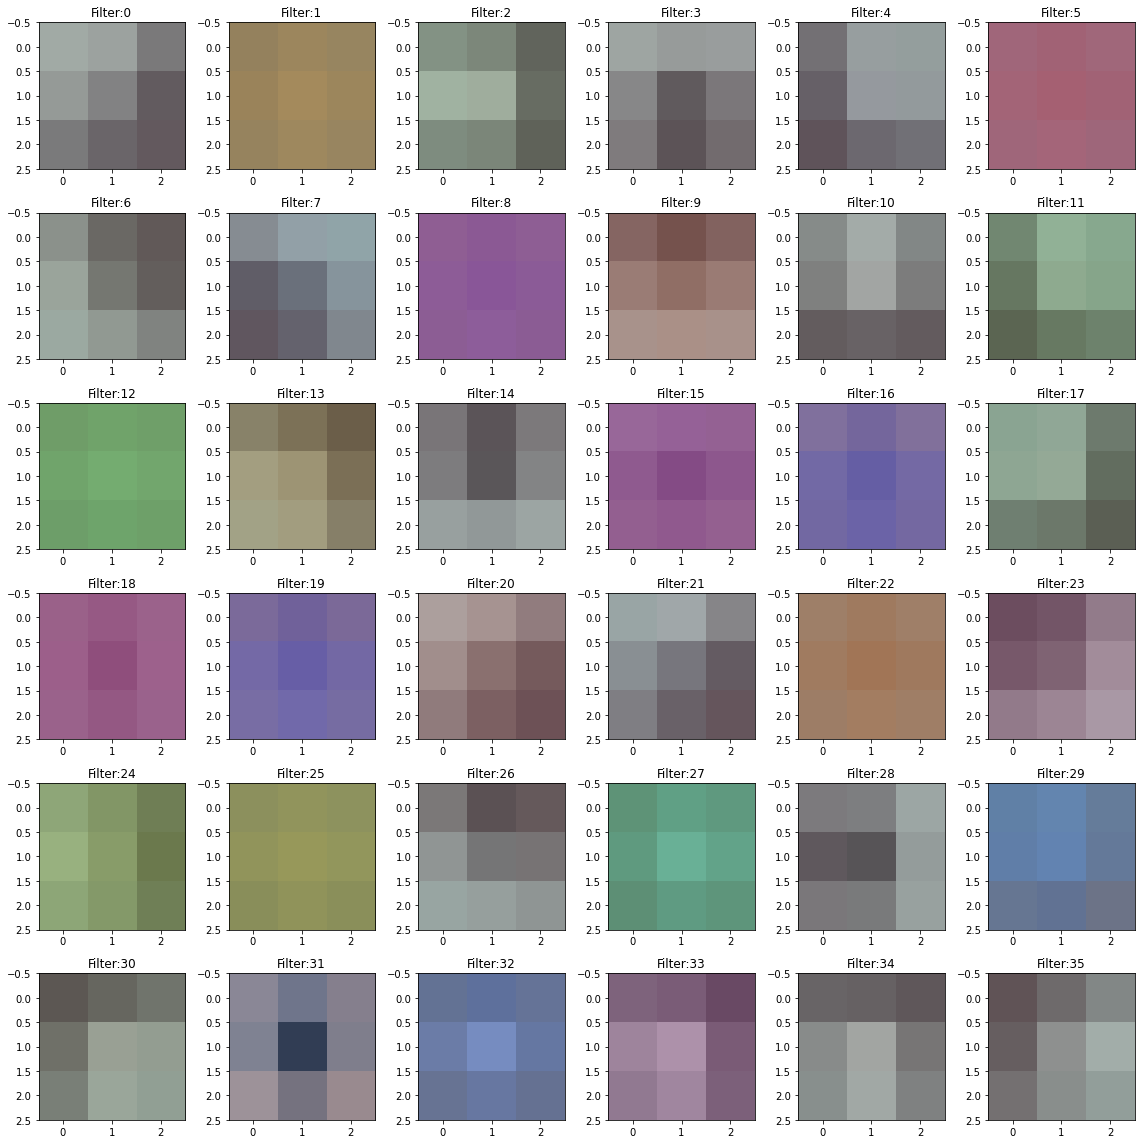

In [17]:
first_conv_filters(model)

number of image exceeds row*col. first 36 images will be drawn


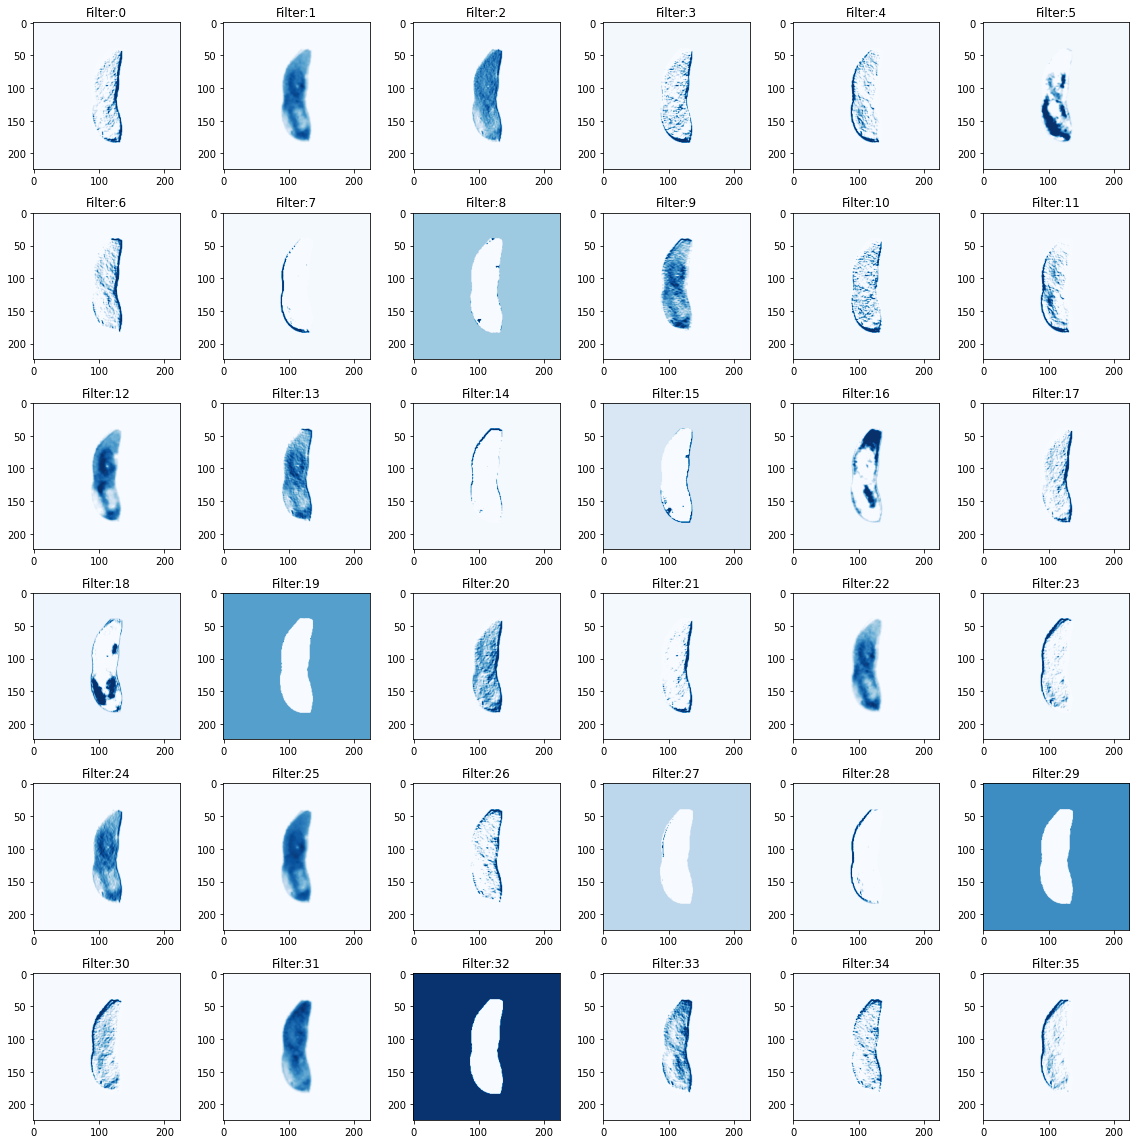

In [15]:
from IPython.core.pylabtools import figsize
figsize(20, 40)
intout = intermediate_output(model,x,"block1_conv1",visualize=True,row=6,col=6,cmap="Blues")

In [9]:
# intout = intermediate_output(model,x,"predictions",visualize=True, cmap="jet")

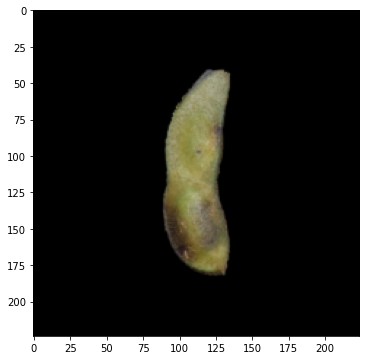

In [10]:
img = imread('../CroppedImageData/Crop_batch4_labeled/disease/croped_IMG_2104_disease_2.jpg')
# model = models.resnet18(pretrained=True)
x = resize(img,(224,224))*255.
x = x.astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(x)

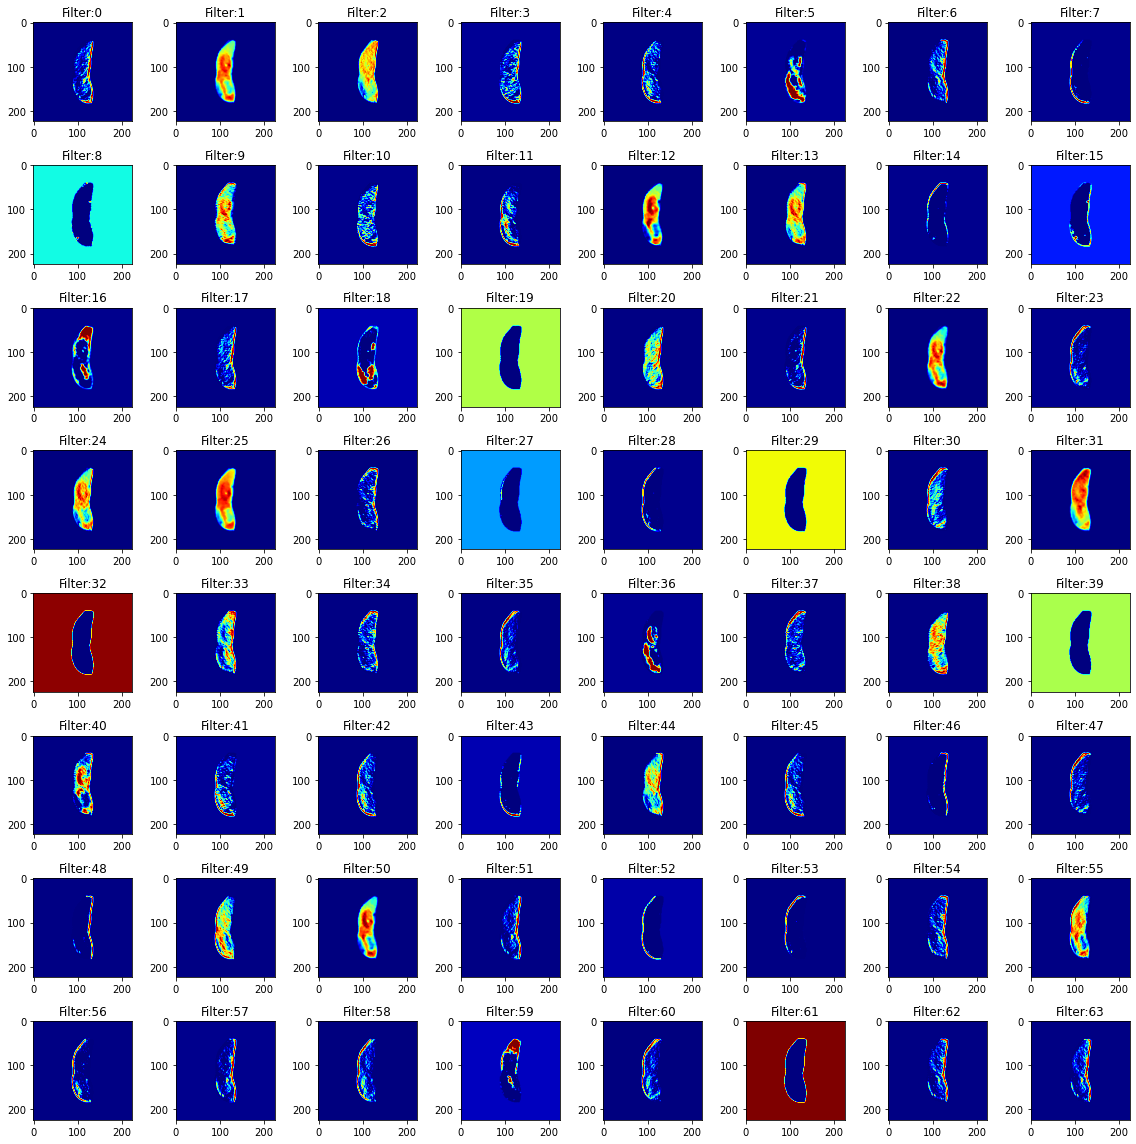

In [11]:
intout = intermediate_output(model,x,"block1_conv1",visualize=True,row=8,col=8,cmap="jet")

In [16]:
# #Inherit Model, create resnet18 and 34
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models, Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D

# # Inherit Layer, establish resnet18 and 34 convolutional layer modules
# class CellBlock(layers.Layer):
#     def __init__(self, filter_num, stride=1):
#         super(CellBlock, self).__init__()

#         self.conv1 = Conv2D(filter_num, (3,3), strides=stride, padding='same')
#         self.bn1 = BatchNormalization()
#         self.relu = Activation('relu')

#         self.conv2 = Conv2D(filter_num, (3,3), strides=1, padding='same')
#         self.bn2 = BatchNormalization()

#         if stride !=1:
#             self.residual = Conv2D(filter_num, (1,1), strides=stride)
#         else:
#             self.residual = lambda x:x
        
#     def call (self, inputs, training=None):

#         x = self.conv1(inputs)
#         x = self.bn1(x)
#         x = self.relu(x)

#         x = self.conv2(x)
#         x = self.bn2(x)

#         r = self.residual(inputs)

#         x = layers.add([x, r])
#         output = tf.nn.relu(x)

#         return output

# class ResNet(models.Model):
#     def __init__(self, layers_dims, nb_classes):
#         super(ResNet, self).__init__()

#         self.stem = Sequential([
#             Conv2D(64, (7,7), strides=(2,2),padding='same'),
#             BatchNormalization(),
#             Activation('relu'),
#             MaxPooling2D((3,3), strides=(2,2), padding='same')
#         ]) #Start module

#         self.layer1 = self.build_cellblock(64, layers_dims[0]) 
#         self.layer2 = self.build_cellblock(128, layers_dims[1], stride=2)
#         self.layer3 = self.build_cellblock(256, layers_dims[2], stride=2)
#         self.layer4 = self.build_cellblock(512, layers_dims[3], stride=2)

#         self.avgpool = GlobalAveragePooling2D()
#         self.fc = Dense(nb_classes, activation='softmax')
    
#     def call(self, inputs, training=None):
#         x=self.stem(inputs)
#         # print(x.shape)

#         x=self.layer1(x)
#         x=self.layer2(x)
#         x=self.layer3(x)
#         x=self.layer4(x)
        
#         x=self.avgpool(x)
#         x=self.fc(x)

#         return x

#     def build_cellblock(self, filter_num, blocks, stride=1):
#         res_blocks = Sequential()
#         res_blocks.add(CellBlock(filter_num, stride)) #The first block stride of each layer may be non-1

#         for _ in range(1, blocks):      #How many blocks each layer consists of
#             res_blocks.add(CellBlock(filter_num, stride=1))

#         return res_blocks


# def build_ResNet(NetName, nb_classes):
#     ResNet_Config = {'ResNet18':[2,2,2,2], 
#                     'ResNet34':[3,4,6,3]}

#     return ResNet(ResNet_Config[NetName], nb_classes) 

# def main():
#     model = build_ResNet('ResNet18', 1000)
#     model.build(input_shape=(None, 224, 224, 3))
#     model.summary()

# if __name__=='__main__':
#     main()    

In [9]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms
import pandas as pd
import cv2 as cv2
from skimage.transform import resize
def VGGfeatures(img):
    base_model = VGG16(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block1_conv1').output)
#     img_path = img
#     img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = resize(img,(224,224))*255.
    x = x.astype(np.uint8)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
#     print(features.shape)
    avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(224, 224),strides=(224, 224), padding='valid')
    output = avg_pool_2d(features)
#     img_to_tensor = transforms.ToTensor()
#     features = img_to_tensor(features)
#     output = F.avg_pool2d(features, kernel_size=features.shape[2], stride=features.shape[2])
#     print(output.shape)
#     output = output.cpu().data.numpy()
    output = output.eval(session=tf.compat.v1.Session()).flatten()
#     print(output.shape)
    return output

In [10]:
img = cv2.imread('../CroppedImageData/Crop_batch4_labeled/disease/croped_IMG_2104_disease_2.jpg')
test = VGGfeatures(img)
test

array([  5.004647 ,  12.094994 ,   1.4514135,   6.5265646,   1.7497381,
        64.86202  ,   2.6569376,  17.373875 ,   5.080888 ,  21.519037 ,
         2.9288042,  16.403875 ,   6.081424 ,  19.84935  ,  69.95302  ,
         9.087648 ,   0.       ,   6.2892947,   6.0488734,  49.775    ,
        21.916903 ,   7.642916 ,  35.715553 ,  15.911098 ,   6.559291 ,
         9.367469 ,   6.4349575,   1.1954699,  45.844707 ,   4.7125216,
         3.8159292,   2.0751643, 103.644035 ,   0.6384395,   2.238971 ,
         4.206462 ,  98.62851  ,   2.2373624,   9.467441 , 154.015    ,
         8.644835 ,  14.111343 ,   2.7382874,  57.85397  ,   7.8924446,
         7.029929 ,   5.7654114,   5.3859634,  25.80026  ,  21.88762  ,
        19.449253 ,   7.4092937,   4.2278404,  16.195713 ,  12.851576 ,
        11.290688 ,   4.302434 ,  16.662556 ,   3.5082233,   0.       ,
         4.4429917, 306.08804  ,   3.944027 ,   2.2078593], dtype=float32)

In [11]:
import cv2 as cv2
def batchExtractVGGDNN(inputDir,outputDir):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,65))
    if os.path.isdir(outputDir):
        pass
    else:
        os.mkdir(outputDir)
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
#         try:
            src = path + image
            imgName = image.split('.')[0]
            img = cv2.imread(src)
            feature = VGGfeatures(img) 
            features.append(feature)
            index.append(imgName)
            df = pd.DataFrame(features,columns = range(1,65),index = index)
            df.index.name = 'Image'
            df.to_csv(outputDir+'VGGFeaturesConv1.csv')
#         except:
#             imread_failed.append(image)
    display(df)
    return df

In [ ]:
df = batchExtractVGGDNN('../testTrainingDataMix/','../csvFiles/')
df